<a href="https://colab.research.google.com/github/robcovino/MSDAP_notebooks/blob/main/Clustering3_HIgh_d_data_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Why is clustering of high dimensional data VERY hard

In this notebook we will study this little funny interesting problem. 

1. Given a line of unitary length, draw 2000 points uniformly on the line. Then calculate the ratio of the points that located 10% from the boundary of the line, and the "interior" points.
2. Repeat the same for a square. Draw 2000 points uniformly distributed and calculate the ratio between interior and exterior points.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# draw 2000 points on a line
from scipy.stats import uniform
rv = uniform()
r = uniform.rvs(size=(2000, 1))

What is your observation? Can you generalize your result for points uniformly distributed in a hypercube of dimension D?


In [ ]:
def point_on_the_edge( D, N ):
    # draw 1000 points on a D-cube (D=1 line, D=2 square) of unitary edge length
    from scipy.stats import uniform
    rv = uniform()
    r = uniform.rvs(size=(N, D)) - 0.5

    pb = (np.abs(r) > 0.4).any(axis=1).sum() / N

    return pb

In [ ]:
point_on_the_edge( 4, 2000 )

0.5975

3. Calculate the ratio of exterior versus all points as a function of D.

In [ ]:
dims = np.arange(1,51)
pbs = np.zeros(50)

N = 1000
for idx in dims:
    pbs[idx - 1] = point_on_the_edge( idx, N )

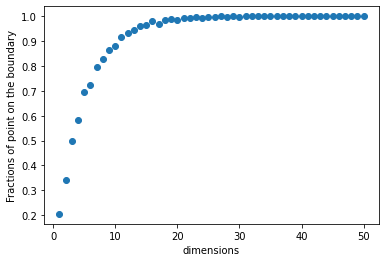

In [ ]:
plt.plot(dims, pbs, 'o')
plt.xlabel('dimensions')
plt.ylabel('Fractions of point on the boundary')
plt.show()

4. Finally, calculate the ratio between average parwise distance and max pairwise distance between all points as a function of D. Suggestion: Look what scipy.spatial has to offer. 

In [ ]:
def typical_distances( D, N ):
    # draw 1000 points on a D-cube (D=1 line, D=2 square) of unitary edge length
    from scipy.stats import uniform
    rv = uniform()
    r = uniform.rvs(size=(N, D))
    # calculate all pair-wise Euclidean distances
    from scipy.spatial.distance import pdist
    dist = pdist(r)
    return np.min(dist), np.max(dist), np.mean(dist)

In [ ]:
K = 200
dims = np.arange(1,K+1)
ratio = np.zeros(K)

N = 1000
for idx in dims:
    min_dist, max_dist, mean_dist = typical_distances( idx, N ) 
    ratio[idx - 1] = mean_dist / max_dist

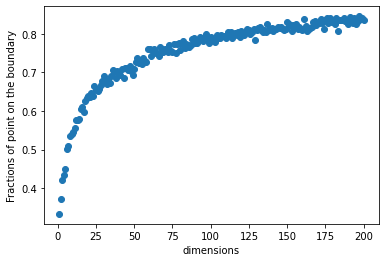

In [ ]:
plt.plot(dims, ratio, 'o')
plt.xlabel('dimensions')
plt.ylabel('Fractions of point on the boundary')
plt.show()

5. (Optional) Repeat the same analysis for a circle, a sphere, and N-dimensional hyperspheres. If you are good at analytical math, you could also calculate the same analytically. 